In [2]:
using CSV
using DataFrames
using MLJ
using VegaLite
using DataVoyager
using Plots
using StatsKit

## Loading the dataset

In [4]:
# data available at: https://www.kaggle.com/datasets/antaresnyc/human-metagenomics

abundance_df = CSV.read("abundance.csv", DataFrame)#depois dar uma olhada em ler o arquivo usando CSV.file
first(abundance_df, 5)

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country
,String,String31,String31,String31,String31,String7,String7,String15
1,Candela_Africa,H10,h10,stool,n,40,female,tanzania
2,Candela_Africa,H11,h11,stool,n,29,female,tanzania
3,Candela_Africa,H12,h12,stool,n,8,female,tanzania
4,Candela_Africa,H13,h13,stool,n,34,male,tanzania
5,Candela_Africa,H14,h14,stool,n,30,male,tanzania


In [7]:
ENV["LINES"] = 30

30

In [8]:
size(abundance_df)

(3610, 3513)

In [9]:
gd = combine(groupby(abundance_df, [:dataset_name, :disease]), nrow => :count)
first(gd, 5)

,dataset_name,disease,count
,String,String31,Int64
1,Candela_Africa,n,38
2,Chatelier_gut_obesity,n,25
3,Chatelier_gut_obesity,obesity,164
4,Chatelier_gut_obesity,leaness,89
5,doyle_bt2,nd,458


In [11]:
print(gd)

40×3 DataFrame
 Row │ dataset_name                       disease                     count 
     │ String                             String31                    Int64 
─────┼──────────────────────────────────────────────────────────────────────
   1 │ Candela_Africa                     n                              38
   2 │ Chatelier_gut_obesity              n                              25
   3 │ Chatelier_gut_obesity              obesity                       164
   4 │ Chatelier_gut_obesity              leaness                        89
   5 │ doyle_bt2                          nd                            458
   6 │ hmp                                n                             762
   7 │ hmpii                              n                             219
   8 │ Loman2013_EcoliOutbreak_DNA_HiSeq  stec2-positive                 43
   9 │ Loman2013_EcoliOutbreak_DNA_HiSeq   -                              1
  10 │ Loman2013_EcoliOutbreak_DNA_MiSeq  stec2-positive              

## Taking only the cirrhosis data

In [12]:
cirr_df = subset(abundance_df, :dataset_name => ByRow(==("Quin_gut_liver_cirrhosis")))
first(cirr_df, 5)

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender
,String,String31,String31,String31,String31,String7,String7
1,Quin_gut_liver_cirrhosis,HD-10,hd-10,stool,n,40,female
2,Quin_gut_liver_cirrhosis,HD-11,hd-11,stool,n,38,female
3,Quin_gut_liver_cirrhosis,HD-12,hd-12,stool,n,40,male
4,Quin_gut_liver_cirrhosis,HD-13,hd-13,stool,n,56,female
5,Quin_gut_liver_cirrhosis,HD-14,hd-14,stool,n,51,male


In [13]:
combine(groupby(cirr_df, :disease), nrow => :count)

,disease,count
,String31,Int64
1,n,114
2,cirrhosis,118


## Separating Metadata and Species Abundance

In [15]:
cirr_meta = cirr_df[:, Between(begin, "group")]
cirr_species = cirr_df[:, Between("k__Archaea", end)];

In [16]:
first(cirr_species, 10)

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria
,Float64,Float64,Float64
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.39518,0.39518,0.39518


In [17]:
first(cirr_meta, 10)

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender
,String,String31,String31,String31,String31,String7,String7
1,Quin_gut_liver_cirrhosis,HD-10,hd-10,stool,n,40,female
2,Quin_gut_liver_cirrhosis,HD-11,hd-11,stool,n,38,female
3,Quin_gut_liver_cirrhosis,HD-12,hd-12,stool,n,40,male
4,Quin_gut_liver_cirrhosis,HD-13,hd-13,stool,n,56,female
5,Quin_gut_liver_cirrhosis,HD-14,hd-14,stool,n,51,male
6,Quin_gut_liver_cirrhosis,HD-15,hd-15,stool,n,56,male
7,Quin_gut_liver_cirrhosis,HD-16,hd-16,stool,n,41,female
8,Quin_gut_liver_cirrhosis,HD-17,hd-17,stool,n,46,male
9,Quin_gut_liver_cirrhosis,HD-18,hd-18,stool,n,43,male


## Removing missing data

In [18]:
cirr_meta_short = cirr_meta[:, any.(i -> (i!=("nd") && i!=("-")), eachcol(cirr_meta))]
first(cirr_meta_short, 10)

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender
,String,String31,String31,String31,String31,String7,String7
1,Quin_gut_liver_cirrhosis,HD-10,hd-10,stool,n,40,female
2,Quin_gut_liver_cirrhosis,HD-11,hd-11,stool,n,38,female
3,Quin_gut_liver_cirrhosis,HD-12,hd-12,stool,n,40,male
4,Quin_gut_liver_cirrhosis,HD-13,hd-13,stool,n,56,female
5,Quin_gut_liver_cirrhosis,HD-14,hd-14,stool,n,51,male
6,Quin_gut_liver_cirrhosis,HD-15,hd-15,stool,n,56,male
7,Quin_gut_liver_cirrhosis,HD-16,hd-16,stool,n,41,female
8,Quin_gut_liver_cirrhosis,HD-17,hd-17,stool,n,46,male
9,Quin_gut_liver_cirrhosis,HD-18,hd-18,stool,n,43,male


In [19]:
zero_col = String[]
for i in names(cirr_species)
    if (maximum(cirr_species[:, i]) == 0)
        push!(zero_col, i)
    end
end

cirr_species_full = copy(cirr_species[:, Not(zero_col)])
first(cirr_species_full, 10)

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria
,Float64,Float64,Float64
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.39518,0.39518,0.39518


In [20]:
genus_names = names((cirr_species_full), x -> contains(x, "g__") && !contains(x, "s__"))
# cirr_genus = copy(cirr_species_full[:, genus_names])

186-element Vector{String}:
 "k__Archaea|p__Euryarchaeota|c__" ⋯ 51 bytes ⋯ "teriaceae|g__Methanobrevibacter"
 "k__Archaea|p__Euryarchaeota|c__" ⋯ 47 bytes ⋯ "obacteriaceae|g__Methanosphaera"
 "k__Bacteria|p__Actinobacteria|c" ⋯ 39 bytes ⋯ "Actinomycetaceae|g__Actinomyces"
 "k__Bacteria|p__Actinobacteria|c" ⋯ 32 bytes ⋯ "les|f__Micrococcaceae|g__Rothia"
 "k__Bacteria|p__Actinobacteria|c" ⋯ 47 bytes ⋯ "bacteriaceae|g__Bifidobacterium"
 "k__Bacteria|p__Actinobacteria|c" ⋯ 43 bytes ⋯ "fidobacteriaceae|g__Gardnerella"
 "k__Bacteria|p__Actinobacteria|c" ⋯ 43 bytes ⋯ "iobacteriaceae|g__Adlercreutzia"
 "k__Bacteria|p__Actinobacteria|c" ⋯ 39 bytes ⋯ "_Coriobacteriaceae|g__Atopobium"
 "k__Bacteria|p__Actinobacteria|c" ⋯ 41 bytes ⋯ "oriobacteriaceae|g__Collinsella"
 "k__Bacteria|p__Actinobacteria|c" ⋯ 54 bytes ⋯ "eae|g__Coriobacteriaceae_noname"
 "k__Bacteria|p__Actinobacteria|c" ⋯ 41 bytes ⋯ "oriobacteriaceae|g__Eggerthella"
 "k__Bacteria|p__Actinobacteria|c" ⋯ 43 bytes ⋯ "iobacteriaceae|g__Gor

In [21]:
cirr_genus_full = copy(cirr_species_full);
cirr_genus_full = cirr_genus_full[:, genus_names];
first(cirr_genus_full, 10)

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter
,Float64
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.39518


In [22]:
splitos = split.(genus_names, "|")

186-element Vector{Vector{SubString{String}}}:
 ["k__Archaea", "p__Euryarchaeota", "c__Methanobacteria", "o__Methanobacteriales", "f__Methanobacteriaceae", "g__Methanobrevibacter"]
 ["k__Archaea", "p__Euryarchaeota", "c__Methanobacteria", "o__Methanobacteriales", "f__Methanobacteriaceae", "g__Methanosphaera"]
 ["k__Bacteria", "p__Actinobacteria", "c__Actinobacteria", "o__Actinomycetales", "f__Actinomycetaceae", "g__Actinomyces"]
 ["k__Bacteria", "p__Actinobacteria", "c__Actinobacteria", "o__Actinomycetales", "f__Micrococcaceae", "g__Rothia"]
 ["k__Bacteria", "p__Actinobacteria", "c__Actinobacteria", "o__Bifidobacteriales", "f__Bifidobacteriaceae", "g__Bifidobacterium"]
 ["k__Bacteria", "p__Actinobacteria", "c__Actinobacteria", "o__Bifidobacteriales", "f__Bifidobacteriaceae", "g__Gardnerella"]
 ["k__Bacteria", "p__Actinobacteria", "c__Actinobacteria", "o__Coriobacteriales", "f__Coriobacteriaceae", "g__Adlercreutzia"]
 ["k__Bacteria", "p__Actinobacteria", "c__Actinobacteria", "o__Corioba

In [23]:
genusnames = Symbol[]
for i in 1:length(splitos)
   push!(genusnames, Symbol(strip(splitos[i][6], ['g','_','_']))) 
end

## Keeping only the genus

In [24]:
DataFrames.rename!(cirr_genus_full, Symbol.(genusnames));
first(cirr_genus_full, 10)

,Methanobrevibacter,Methanosphaera,Actinomyces,Rothia,Bifidobacterium,Gardnerella
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.11273,0.0
3,0.0,0.0,0.0,0.0,0.05692,0.0
4,0.0,0.0,0.0,0.0,0.15253,0.0
5,0.0,0.0,0.0,0.0,0.29028,0.0
6,0.0,0.0,0.0,0.0,0.00448,0.0
7,0.0,0.0,0.0,0.00068,0.00366,0.0
8,0.0,0.0,0.0,0.0,5.57473,0.0
9,0.39518,0.0,0.03917,0.08068,0.07892,0.0


In [25]:
genus_count = String[]
for i in eachindex(splitos)
    for j in 1:length(splitos[i])
        if contains(splitos[i][j], "g__")
            push!(genus_count, String(splitos[i][j]))
        end
    end
end

In [26]:
genus_count_df = DataFrame(a1 = genus_count)
first(genus_count_df, 10)
# print(combine(groupby(genus_count_df, :a1), nrow => :count))

,a1
,String
1,g__Methanobrevibacter
2,g__Methanosphaera
3,g__Actinomyces
4,g__Rothia
5,g__Bifidobacterium
6,g__Gardnerella
7,g__Adlercreutzia
8,g__Atopobium
9,g__Collinsella


In [27]:
size(cirr_genus_full)

(232, 186)

In [28]:
cirr_genus_full.disease = cirr_meta_short.disease;
size(cirr_genus_full)

(232, 187)

In [29]:
case = subset(cirr_genus_full, :disease => ByRow(==("cirrhosis")))
control = subset(cirr_genus_full, :disease => ByRow(==("n")))

,Methanobrevibacter,Methanosphaera,Actinomyces,Rothia,Bifidobacterium,Gardnerella
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.11273,0.0
3,0.0,0.0,0.0,0.0,0.05692,0.0
4,0.0,0.0,0.0,0.0,0.15253,0.0
5,0.0,0.0,0.0,0.0,0.29028,0.0
6,0.0,0.0,0.0,0.0,0.00448,0.0
7,0.0,0.0,0.0,0.00068,0.00366,0.0
8,0.0,0.0,0.0,0.0,5.57473,0.0
9,0.39518,0.0,0.03917,0.08068,0.07892,0.0


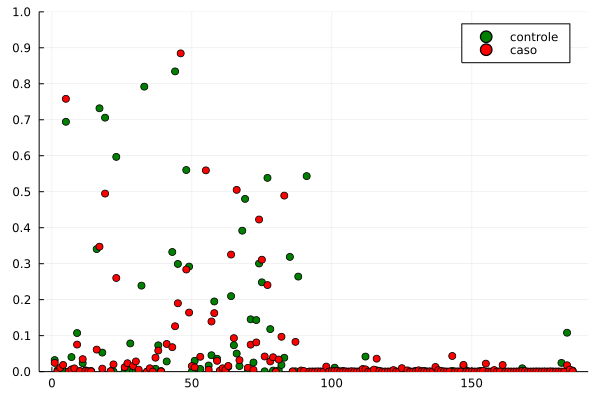

In [30]:
case_mean = Float64[]
control_mean = Float64[]
for name in names(case[:, Not(:disease)])
    append!(case_mean, mean(case[:, Symbol(name)]))
    append!(control_mean, mean(control[:, Symbol(name)]))
end

plot(seriestype = :scatter, control_mean, ylims = ((0, 1)), ytick = 0:0.1:1, color=:green, label = "controle")
scatter!(case_mean, color = :red, label = "caso")

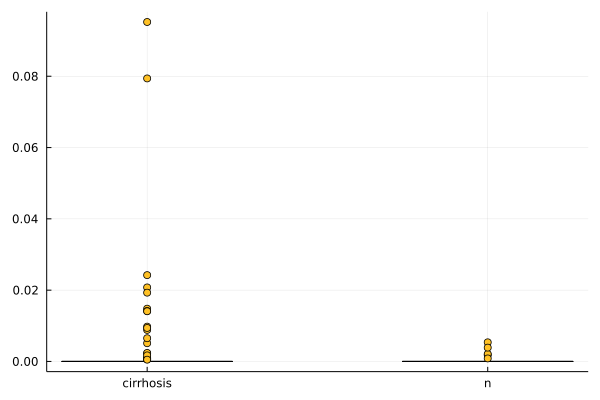

In [31]:
using StatsPlots
boxplot(cirr_genus_full.disease, cirr_genus_full[:, :Solobacterium],
color = :goldenrod1, whisker_width = 0.5, bar_width = 0.5, legend = false)

In [32]:
OneSampleTTest(case[1:114, :Solobacterium], control[:, :Solobacterium])

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.00262193
    95% confidence interval: (0.0003718, 0.004872)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0228

Details:
    number of observations:   114
    t-statistic:              2.308540395102963
    degrees of freedom:       113
    empirical standard error: 0.0011357521965494838


## Keeping only the relevant features using hypothesis test.

In [33]:
genus_diff = String[]
for name in names(cirr_genus_full[:, Not(:disease)])
    pvalor = pvalue(OneSampleTTest(case[1:114, name], control[:, name]))
    if (pvalor <= 0.05)
       push!(genus_diff, name) 
    end
end

genus_diff_df = copy(cirr_genus_full[:, genus_diff]);
genus_diff_df.disease = cirr_genus_full.disease
print(names(genus_diff_df))
# print(OneSampleTTest(control[:, 3], case[1:114, 3]))
# pvalue(OneSampleTTest(case[1:114, 3], control[:, 3]))

["Actinomyces", "Rothia", "Adlercreutzia", "Atopobium", "Olsenella", "Bacteroides", "Bacteroidales_noname", "Barnesiella", "Coprobacter", "Odoribacter", "Alloprevotella", "Paraprevotella", "Alistipes", "Granulicatella", "Lactobacillus", "Weissella", "Streptococcus", "Clostridium", "Clostridiales_noname", "Eubacterium", "Blautia", "Coprococcus", "Dorea", "Roseburia", "Oscillibacter", "Anaerotruncus", "Faecalibacterium", "Ruminococcus", "Subdoligranulum", "Coprobacillus", "Solobacterium", "Megasphaera", "Veillonella", "Leptotrichiaceae_unclassified", "Burkholderiales_noname", "Oxalobacter", "Neisseria", "Bilophila", "Desulfovibrio", "Campylobacter", "Citrobacter", "Escherichia", "Klebsiella", "Aggregatibacter", "Haemophilus", "Butyricimonas", "Gemella", "Staphylococcus", "Butyricicoccus", "Clostridiales_Family_XIII_Incertae_Sedis_unclassified", "Oribacterium", "Selenomonas", "Burkholderia", "Pantoea", "Raoultella", "Actinobacillus", "Leptotrichia", "Eikenella", "disease"]

In [29]:
# genus_test = copy(cirr_genus_full[:, Not(:disease)])
# for name in names(genus_test)
#     genus_test[:, name] = genus_test[:, name] .+ 0.001
#     genus_test[:, name] = log.(2, genus_test[:, name])
# end
# first(genus_test, 10)

In [34]:
first(genus_diff_df, 10)

,Actinomyces,Rothia,Adlercreutzia,Atopobium,Olsenella,Bacteroides,Bacteroidales_noname
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,57.415,0.0
2,0.0,0.0,0.08773,0.0,0.0,26.5831,0.0
3,0.0,0.0,0.05996,0.0,0.0,40.8567,0.32786
4,0.0,0.0,0.0,0.0,0.0,41.0404,0.0
5,0.0,0.0,0.0,0.0,0.0,23.8563,1.3074
6,0.0,0.0,0.02209,0.0,0.0,17.8417,0.17071
7,0.0,0.00068,0.08967,0.0,0.0,28.2141,0.0
8,0.0,0.0,0.0,0.0,0.0,12.9702,0.36746
9,0.03917,0.08068,0.06967,0.0,0.0,8.5884,0.18227


In [35]:
y, X = unpack(cirr_genus_full, ==(:disease), colname->true)

(String31["n", "n", "n", "n", "n", "n", "n", "n", "n", "n"  …  "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis"], 232×186 DataFrame
 Row │ Methanobrevibacter  Methanosphaera  Actinomyces  Rothia   Bifidobacteri ⋯
     │ Float64             Float64         Float64      Float64  Float64       ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │            0.0                 0.0      0.0      0.0              0.0   ⋯
   2 │            0.0                 0.0      0.0      0.0              0.112
   3 │            0.0                 0.0      0.0      0.0              0.056
   4 │            0.0                 0.0      0.0      0.0              0.152
   5 │            0.0                 0.0      0.0      0.0              0.290 ⋯
   6 │            0.0                 0.0      0.0      0.0              0.004
   7 │            0.0                 0.0      0.0      0.00068    

## Loading the SGDC model

In [36]:
transformer_instance = Standardizer()
transformer_model = machine(transformer_instance, X)
fit!(transformer_model)
X = MLJ.transform(transformer_model, X);

┌ Info: Training machine(Standardizer(features = Symbol[], …), …).
└ @ MLJBase /home/lucas/.julia/packages/MLJBase/rQDaq/src/machines.jl:487


In [38]:
yc = coerce(y, OrderedFactor)
first(yc, 10)

10-element CategoricalArray{String31,1,UInt32}:
 "n"
 "n"
 "n"
 "n"
 "n"
 "n"
 "n"
 "n"
 "n"
 "n"

In [39]:
train, test = partition(collect(eachindex(yc)), 0.7, shuffle = true, rng = 223)

([221, 29, 101, 80, 57, 219, 8, 134, 33, 211  …  192, 10, 155, 97, 39, 194, 46, 116, 124, 171], [12, 203, 227, 16, 18, 225, 148, 25, 122, 81  …  138, 35, 70, 165, 95, 174, 216, 85, 69, 163])

In [40]:
SGDC = @load SGDClassifier pkg = ScikitLearn
sgdc = SGDC()

import MLJScikitLearnInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/lucas/.julia/packages/MLJModels/lDzCR/src/loading.jl:168


SGDClassifier(
  loss = "hinge", 
  penalty = "l2", 
  alpha = 0.0001, 
  l1_ratio = 0.15, 
  fit_intercept = true, 
  max_iter = 1000, 
  tol = 0.001, 
  shuffle = true, 
  verbose = 0, 
  epsilon = 0.1, 
  n_jobs = nothing, 
  random_state = nothing, 
  learning_rate = "optimal", 
  eta0 = 0.0, 
  power_t = 0.5, 
  early_stopping = false, 
  validation_fraction = 0.1, 
  n_iter_no_change = 5, 
  class_weight = nothing, 
  warm_start = false, 
  average = false)

## Training steps

In [41]:
sgdc_mach = machine(sgdc, X, yc)
evalu = evaluate!(sgdc_mach, 
    resampling = CV(nfolds=5, rng=223),
    measures = [accuracy, f1score],
    rows = train,
    repeats = 6)
#fit!(sgdc_mach, rows=train)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase /home/lucas/.julia/packages/MLJBase/rQDaq/src/resampling.jl:599
Evaluating over 30 folds: 100%[=========================] Time: 0:00:11


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌──────────────────┬───────────┬─────────────┬─────────┬────────────────────────
│ measure          │ operation │ measurement │ 1.96*SE │ per_fold              ⋯
├──────────────────┼───────────┼─────────────┼─────────┼────────────────────────
│ Accuracy()       │ predict   │ 0.743       │ 0.0263  │ [0.758, 0.697, 0.781, ⋯
│ FScore(          │ predict   │ 0.727       │ 0.0296  │ [0.765, 0.667, 0.759, ⋯
│   β = 1.0,       │           │             │         │                       ⋯
│   rev = nothing) │           │             │         │                       ⋯
└──────────────────┴───────────┴─────────────┴─────────┴────────────────────────
                                                                1 column omitted


In [42]:
feature_power_sgdc_1 = DataFrame(genus = names(cirr_genus_full[:, Not(:disease)]), power = vec(fitted_params(sgdc_mach).coef))
sort!(feature_power_sgdc_1, [:power], rev = true);

In [43]:
r = [range(sgdc, :loss, values = ["log_loss", "hinge"]),
range(sgdc, :penalty, values = ["l2", "l1"]),
range(sgdc, :alpha, lower = 1e-3, upper=1e-1, scale=:log10)];

self_tuning_sgdc = TunedModel(model = sgdc, range = r, tuning = Grid(resolution = 5), 
resampling = StratifiedCV(nfolds = 6, rng = 123), measure = MisclassificationRate());

sgdc_tuned_mach = machine(self_tuning_sgdc, X, yc)

Machine trained 0 times; does not cache data
  model: DeterministicTunedModel(model = SGDClassifier(loss = hinge, …), …)
  args: 
    1:	Source @399 ⏎ `Table{AbstractVector{ScientificTypesBase.Continuous}}`
    2:	Source @459 ⏎ `AbstractVector{OrderedFactor{2}}`


In [44]:
evalu_tune = evaluate!(sgdc_tuned_mach, 
    resampling = CV(nfolds=5, rng=123),
    measures = [accuracy, f1score],
    rows = train,
    repeats = 5)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase /home/lucas/.julia/packages/MLJBase/rQDaq/src/resampling.jl:599
Evaluating over 25 folds: 100%[=========================] Time: 0:00:48


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌──────────────────┬───────────┬─────────────┬─────────┬────────────────────────
│ measure          │ operation │ measurement │ 1.96*SE │ per_fold              ⋯
├──────────────────┼───────────┼─────────────┼─────────┼────────────────────────
│ Accuracy()       │ predict   │ 0.759       │ 0.0284  │ [0.697, 0.697, 0.875, ⋯
│ FScore(          │ predict   │ 0.751       │ 0.0338  │ [0.688, 0.722, 0.889, ⋯
│   β = 1.0,       │           │             │         │                       ⋯
│   rev = nothing) │           │             │         │                       ⋯
└──────────────────┴───────────┴─────────────┴─────────┴────────────────────────
                                                                1 column omitted


In [45]:
fitted_params(sgdc_tuned_mach).best_model

SGDClassifier(
  loss = "hinge", 
  penalty = "l1", 
  alpha = 0.01, 
  l1_ratio = 0.15, 
  fit_intercept = true, 
  max_iter = 1000, 
  tol = 0.001, 
  shuffle = true, 
  verbose = 0, 
  epsilon = 0.1, 
  n_jobs = nothing, 
  random_state = nothing, 
  learning_rate = "optimal", 
  eta0 = 0.0, 
  power_t = 0.5, 
  early_stopping = false, 
  validation_fraction = 0.1, 
  n_iter_no_change = 5, 
  class_weight = nothing, 
  warm_start = false, 
  average = false)

In [46]:
feature_power_tuned_sgdc = DataFrame(genus = names(cirr_genus_full[:, Not(:disease)]), 
power = vec(fitted_params(sgdc_tuned_mach).best_fitted_params.coef))

sort!(feature_power_tuned_sgdc, [:power], rev = true);

In [47]:
y1, X1 = unpack(genus_diff_df, ==(:disease), colname->true)

(String31["n", "n", "n", "n", "n", "n", "n", "n", "n", "n"  …  "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis", "cirrhosis"], 232×58 DataFrame
 Row │ Actinomyces  Rothia   Adlercreutzia  Atopobium  Olsenella  Bacteroides  ⋯
     │ Float64      Float64  Float64        Float64    Float64    Float64      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     0.0      0.0            0.0        0.0        0.0         57.415    ⋯
   2 │     0.0      0.0            0.08773    0.0        0.0         26.5831
   3 │     0.0      0.0            0.05996    0.0        0.0         40.8567
   4 │     0.0      0.0            0.0        0.0        0.0         41.0404
   5 │     0.0      0.0            0.0        0.0        0.0         23.8563   ⋯
   6 │     0.0      0.0            0.02209    0.0        0.0         17.8417
   7 │     0.0      0.00068        0.08967    0.0        0.0         28.2141

In [48]:
yc1 = coerce(y1, OrderedFactor)
first(yc1, 10)

10-element CategoricalArray{String31,1,UInt32}:
 "n"
 "n"
 "n"
 "n"
 "n"
 "n"
 "n"
 "n"
 "n"
 "n"

In [49]:
train1, test1 = partition(collect(eachindex(yc1)), 0.7, shuffle = true, rng = 223)

([221, 29, 101, 80, 57, 219, 8, 134, 33, 211  …  192, 10, 155, 97, 39, 194, 46, 116, 124, 171], [12, 203, 227, 16, 18, 225, 148, 25, 122, 81  …  138, 35, 70, 165, 95, 174, 216, 85, 69, 163])

In [50]:
sgdc_mach_sel = machine(sgdc, X1, yc1)
evalu_sel = evaluate!(sgdc_mach_sel, 
    resampling = CV(nfolds=5, rng=223),
    measures = [accuracy, f1score],
    rows = train1,
    repeats = 6)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase /home/lucas/.julia/packages/MLJBase/rQDaq/src/resampling.jl:599
Evaluating over 30 folds: 100%[=========================] Time: 0:00:00


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌──────────────────┬───────────┬─────────────┬─────────┬────────────────────────
│ measure          │ operation │ measurement │ 1.96*SE │ per_fold              ⋯
├──────────────────┼───────────┼─────────────┼─────────┼────────────────────────
│ Accuracy()       │ predict   │ 0.746       │ 0.0348  │ [0.788, 0.667, 0.688, ⋯
│ FScore(          │ predict   │ 0.742       │ 0.0587  │ [0.829, 0.732, 0.75,  ⋯
│   β = 1.0,       │           │             │         │                       ⋯
│   rev = nothing) │           │             │         │                       ⋯
└──────────────────┴───────────┴─────────────┴─────────┴────────────────────────
                                                                1 column omitted


In [51]:
feature_power_sgdc_2 = DataFrame(genus = names(genus_diff_df[:, Not(:disease)]), power = vec(fitted_params(sgdc_mach_sel).coef))
sort!(feature_power_sgdc_2, [:power], rev = true);

In [52]:
r = [range(sgdc, :loss, values = ["log_loss", "hinge"]),
range(sgdc, :penalty, values = ["l2", "l1"]),
range(sgdc, :alpha, lower = 1e-3, upper=1e-1, scale=:log10)];

self_tuning_sgdc_sel = TunedModel(model = sgdc, range = r, tuning = Grid(resolution = 5), 
resampling = StratifiedCV(nfolds = 6, rng = 223), measure = MisclassificationRate());

sgdc_tuned_mach_sel = machine(self_tuning_sgdc_sel, X1, yc1)

Machine trained 0 times; does not cache data
  model: DeterministicTunedModel(model = SGDClassifier(loss = hinge, …), …)
  args: 
    1:	Source @621 ⏎ `Table{AbstractVector{ScientificTypesBase.Continuous}}`
    2:	Source @678 ⏎ `AbstractVector{OrderedFactor{2}}`


In [53]:
evalu_tune_sel = evaluate!(sgdc_tuned_mach_sel, 
    resampling = CV(nfolds=5, rng=223),
    measures = [accuracy, f1score],
    rows = train1,
    repeats = 5)

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase /home/lucas/.julia/packages/MLJBase/rQDaq/src/resampling.jl:599
/home/lucas/.julia/conda/3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Evaluating over 25 folds:  16%[====>                    ]  ETA: 0:00:13/home/lucas/.julia/conda/3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Evaluating over 25 folds:  24%[======>                  ]  ETA: 0:00:12/home/lucas/.julia/conda/3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  

PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌──────────────────┬───────────┬─────────────┬─────────┬────────────────────────
│ measure          │ operation │ measurement │ 1.96*SE │ per_fold              ⋯
├──────────────────┼───────────┼─────────────┼─────────┼────────────────────────
│ Accuracy()       │ predict   │ 0.815       │ 0.0199  │ [0.818, 0.818, 0.75,  ⋯
│ FScore(          │ predict   │ 0.801       │ 0.0282  │ [0.824, 0.824, 0.75,  ⋯
│   β = 1.0,       │           │             │         │                       ⋯
│   rev = nothing) │           │             │         │                       ⋯
└──────────────────┴───────────┴─────────────┴─────────┴────────────────────────
                                                                1 column omitted


## Results

In [54]:
fitted_params(sgdc_tuned_mach_sel).best_model

SGDClassifier(
  loss = "hinge", 
  penalty = "l1", 
  alpha = 0.1, 
  l1_ratio = 0.15, 
  fit_intercept = true, 
  max_iter = 1000, 
  tol = 0.001, 
  shuffle = true, 
  verbose = 0, 
  epsilon = 0.1, 
  n_jobs = nothing, 
  random_state = nothing, 
  learning_rate = "optimal", 
  eta0 = 0.0, 
  power_t = 0.5, 
  early_stopping = false, 
  validation_fraction = 0.1, 
  n_iter_no_change = 5, 
  class_weight = nothing, 
  warm_start = false, 
  average = false)

In [55]:
feature_power_tuned_sgdc_sel = DataFrame(genus = names(genus_diff_df[:, Not(:disease)]), 
power = vec(fitted_params(sgdc_tuned_mach_sel).best_fitted_params.coef))

sort!(feature_power_tuned_sgdc_sel, [:power], rev = true);

In [56]:
first(feature_power_sgdc_1, 10)

,genus,power
,String,Float64
1,Cetobacterium,57.8756
2,Anaerofustis,53.085
3,Propionibacteriaceae_unclassified,52.0049
4,Oxalobacter,51.2242
5,Burkholderia,51.004
6,Granulicella,50.6311
7,Peptostreptococcaceae_noname,50.1489
8,Dorea,49.4051
9,Adlercreutzia,47.8357


In [57]:
first(feature_power_tuned_sgdc, 10)

,genus,power
,String,Float64
1,Butyricimonas,15.408
2,Cetobacterium,14.1971
3,Bilophila,12.8411
4,Pseudoflavonifractor,8.9381
5,Dorea,6.92519
6,Bacteroides,6.84129
7,Rhodopseudomonas,5.68702
8,Catenibacterium,4.41126
9,Peptostreptococcaceae_noname,3.65317


In [58]:
first(feature_power_sgdc_2, 10)

,genus,power
,String,Float64
1,Coprococcus,247.994
2,Bilophila,225.374
3,Subdoligranulum,220.402
4,Paraprevotella,122.731
5,Bacteroidales_noname,114.001
6,Dorea,47.3339
7,Burkholderiales_noname,44.2802
8,Desulfovibrio,42.8921
9,Roseburia,41.8871


In [59]:
first(feature_power_tuned_sgdc_sel, 10)

,genus,power
,String,Float64
1,Bacteroides,0.178165
2,Alistipes,0.154622
3,Roseburia,0.0938888
4,Actinomyces,0.0
5,Rothia,0.0
6,Adlercreutzia,0.0
7,Atopobium,0.0
8,Olsenella,0.0
9,Bacteroidales_noname,0.0


## Resultado sem tunagem nem feature selection

In [60]:
yhat = MLJ.predict(sgdc_mach, rows = test);
print(
    "Measurements:\n",
    "  f1 score: ", f1score(yhat, yc[test]), "\n",
    "  accuracy:   ", accuracy(yhat, yc[test]), "\n"
)
ConfusionMatrix()(yhat, yc[test])

Measurements:
  f1 score: 0.7428571428571429
  accuracy:   0.7428571428571429


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │  cirrhosis  │      n      │
├─────────────┼─────────────┼─────────────┤
│  cirrhosis  │     26      │      9      │
├─────────────┼─────────────┼─────────────┤
│      n      │      9      │     26      │
└─────────────┴─────────────┴─────────────┘


## Resultado com tunagem e sem feature selection 

In [61]:
yhat = MLJ.predict(sgdc_tuned_mach, rows = test);
print(
    "Measurements:\n",
    "  f1 score: ", f1score(yhat, yc[test]), "\n",
    "  accuracy:   ", accuracy(yhat, yc[test]), "\n"
)
ConfusionMatrix()(yhat, yc[test])

Measurements:
  f1 score: 0.7671232876712328
  accuracy:   0.7571428571428571


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │  cirrhosis  │      n      │
├─────────────┼─────────────┼─────────────┤
│  cirrhosis  │     25      │      7      │
├─────────────┼─────────────┼─────────────┤
│      n      │     10      │     28      │
└─────────────┴─────────────┴─────────────┘


## Resultado sem tunagem e com feature selection 

In [63]:
yhat_sel = MLJ.predict(sgdc_mach_sel, rows = test1);
print(
    "Measurements:\n",
    "  f1 score: ", f1score(yhat_sel, yc1[test1]), "\n",
    "  accuracy:   ", accuracy(yhat_sel, yc1[test1]), "\n"
)
ConfusionMatrix()(yhat_sel, yc1[test1])

Measurements:
  f1 score: 0.8405797101449275
  accuracy:   0.8428571428571429


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │  cirrhosis  │      n      │
├─────────────┼─────────────┼─────────────┤
│  cirrhosis  │     30      │      6      │
├─────────────┼─────────────┼─────────────┤
│      n      │      5      │     29      │
└─────────────┴─────────────┴─────────────┘


## Resultado com tunagem e com feature selection

In [64]:
yhat_sel_tune = MLJ.predict(sgdc_tuned_mach_sel, rows = test1);
print(
    "Measurements:\n",
    "  f1 score: ", f1score(yhat_sel_tune, yc1[test1]), "\n",
    "  accuracy:   ", accuracy(yhat_sel_tune, yc1[test1]), "\n"
)
ConfusionMatrix()(yhat_sel_tune, yc1[test1])

Measurements:
  f1 score: 0.85
  accuracy:   0.8285714285714285


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │  cirrhosis  │      n      │
├─────────────┼─────────────┼─────────────┤
│  cirrhosis  │     24      │      1      │
├─────────────┼─────────────┼─────────────┤
│      n      │     11      │     34      │
└─────────────┴─────────────┴─────────────┘
